# Session 10: Accuracy, Clustering, and Neural Networks
MSA 8010: Data Programming

Agenda:
- Accuracy
- Clustering
    - K-Means 
- Deep Learning

Sources:
- https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.metrics.confusion_matrix
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- https://scikit-learn.org/stable/modules/clustering.html
- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
- https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail
- https://www.kaggle.com/parasjindal96/basic-deep-learning-tutorial-using-keras/notebook
- https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79
- https://developers.google.com/machine-learning/crash-course

### Model Performance Metrics

- True and False Positives, and Negatives
- Accuracy
- Precision
- Recall
- F1 Score

#### A short story
A shepherd boy gets bored tending the town's flock. To have some fun, he cries out, "Wolf!" even though no wolf is in sight. The villagers run to protect the flock, but then get really mad when they realize the boy was playing a joke on them.

_[Iterate previous paragraph N times.]_

One night, the shepherd boy sees a real wolf approaching the flock and calls out, "Wolf!" The villagers refuse to be fooled again and stay in their houses. The hungry wolf turns the flock into lamb chops. The town goes hungry. Panic ensues.

#### True and False Positives, and Negatives
Let's make the following definitions:

- `Wolf` is a positive class.
- `No wolf` is a negative class.


<table>

  <tr>
    <th>True Positive</th>
    <th>False Positive</th>
  </tr>
  <tr>
    <td><span style="font-weight:400;font-style:normal">A wolf threatened and shepherd said: "Wolf."</span></td>
    <td><span style="font-weight:400;font-style:normal">No wolf threatened but shepherd said: "Wolf."</span></td>
  </tr>
  <tr>
    <th><span style="font-weight:600;">False Negative</span></th>
    <th><span style="font-weight:600;">True Negative</span></th>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">A wolf threatened but shepherd said: "No wolf."  </span></td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">No wolf threatened and shepherd said: "No wolf."</span></td>
  </tr>

</table>


#### Confusion Matrix
- Confusion matrix is a practical table to show a model's performance. Left labels show acutal values, and top labels show predicted values.
- The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

    <img src="conf1.jpeg" width="70%" />

<table><tr><td><img src="conf2.jpeg" width="100%" /></td><td><img src="conf1.jpeg" width="100%" /></td></tr></table>

- For this example:
    - `TP`: 1 (actually positive, and model predicted positive)
    - `FN`: 1 (actually positive, and model predicted negative)
    - `FP`: 0 (actually negative, but model predicted positive)
    - `TN`: 998 (actually negative, and model predicted negative)

- **Question:** What is the accuracy of this confusion matrix? (think for a minute, then view the next slide)

#### Accuracy
$Accuracy$ is the number of correct predictions (true positives (`tp`) + true negatives (`tn`) over the total number of predictions.

\begin{align}
  \text{Accuracy} &= \frac{tp+tn}{tp +fp +fn + tn} \\
\end{align}


Therefore, the accuracy of the previous example is:

\begin{align}
  \text{Accuracy} &= \frac{1+998}{1 +0 +1 + 998} = \frac{999}{1000} = 99.9\% \\
\end{align}

<img src="conf1.jpeg" width="70%" />

- **Note:** Accuracy alone doesn't tell the full story when you're working with a class-imbalanced data set, like this one. 

#### Precision
$Precision$ is defined as the number of true positives (`tp`) over the number of true positives plus the number of false positives (`fp`).

\begin{align}
  \text{Precision} &= \frac{tp}{tp + fp} \\
\end{align}

<table><tr><td><img src="conf2.jpeg" /></td><td><img src="conf1.jpeg" /></td></tr></table>

- Precision is a good measure to determine, when **the costs of False Positive is high**.
- For example:
    - _Email spam detection:_ We prefer to have some spams in the Inbox (False Negative) rather than an important email in the Spam folder (False Positive).
    
- **Question:** What is the precision of the previous example? 

#### Recall
$Recall$ is defined as the number of true positives (`tp`) over the number of true positives plus the number of false negatives (`fn`).

\begin{align}
     \text{Recall} &= \frac{tp}{tp + fn} \\
\end{align}

<table><tr><td><img src="conf2.jpeg" /></td><td><img src="conf1.jpeg" /></td></tr></table>

- Recall is a good measure to determine, when **the costs of False Negative is high.**
- For example:
    - _Cancer Detection:_ It is okay to have some false detection of cancer (False Positive), because it is possible to redo the test or perform more tests. But it is not okay to have a classifier that ignores a possible cancer (False Negative).

- **Question:** What is the recall of the previous example? 

#### F1-Score

Usually there is a competition between precision and recall and we cannot minimize both. In some problems both False Positives and False Negatives have a similar importance and we want a model that is not biased toward one of those.
The $F1$ score considers both precision and recall:

\begin{align}
     \text{F1} &= 2 \frac{precision * recall}{precision + recall} \\
\end{align}

- F1 is a good measure to determine, when **it is important to have a balance between FP and FN.**
- Compared to the _accuracy_, F1 Score might be a better measure to use if:
    - We need to seek a balance between Precision and Recall (similar to accuracy)
    - And, there is an uneven class distribution (large number of Actual Negatives).
- **Question:** What is the F1 of the previous example? 

### Metrics Summary

<table><tr><td><center><H5>Precision:</H5></center><img src="precision.jpeg" /></td>
    <td><center><H5>Recall:</H5></center><img src="recall.jpeg" /></td>
    <td><center><H5>Accuracy:</H5></center><img src="accuracy.jpeg" /></td></tr></table>

- Increase $Precision$ when you prefer less False positives.
- Increase $Recall$ when you prefer less False negatives.
- Increase $F1$ if you have an imbalanced dataset and both precision, and recall have the same importance.
- Increase $Accuracy$ if you have a balanced dataset and you want a more accurate model regardless of precision and recall.


In [1]:
from sklearn.metrics import confusion_matrix
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

<img src="conf_multi.jpeg" width="70%" />

In [2]:
y_true = [0, 1, 0, 1]
y_pred = [1, 1, 1, 0]
matrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = matrix.ravel()

print(matrix)
(tn, fp, fn, tp)

[[0 2]
 [1 1]]


(0, 2, 1, 1)

**Question:** Considering the following values, show:
- Accuracy
- Precision
- Recall
- F1-Score

In [3]:
from sklearn.metrics import confusion_matrix

# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]

# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]

y_true = act_pos + act_neg
y_pred = pred_pos + pred_neg
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(9970, 30, 10, 90)

**Answer:**

### Clustering

- Grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other.
    - Examples: Anything with classification, but without labels. Such as: spam filtering, suspecious activities in a bank transactions, risk of customers for insurance companies
- In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

### Clustering vs. Classification

- Unlike classification, for clustering we deal with unlabeled data (i.e., data without defined categories or groups).
- Clustering is an example of unsupervised learning, while Classification is a task of supervised learning.
- As in a classification task we have labels, so we use training and testing sets for verifying and improving the model.

### Clustering: K-Means

- The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable $K$.
- The algorithm works iteratively to assign each data point to one of $K$ groups based on the features that are provided.
- Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
    1. The centroids of the $K$ clusters, which can be used to label new data
    2. Labels, that is assigning a single cluster for each data sample

- K-Means can be used to confirm business assumptions or reveal new information, such as:
    - To identiy how groups separate from each other. (e.g., customers) 
    - To identify unknown groups in complex data sets.

- K-Means is a versatile algorithm that can be used for any type of grouping.
- K-Means uses the [Expectation-Maximization](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) method. 

<img src="kmeans.png" />

#### K-Means Algorithm

1. It begins with choosing the number of K clusters. 
    - Sometimes the $K$ is clearly visible from the dataset when visualized. 
    - However, most of the times this is not the case and we should choose a proper $K$ value.

<img src="kmeans-1.png" width="50%" />

_In this example, let's assume $K=2$._

2. The second step is to allocate $K$ random points as centroids.

<img src="kmeans-2.png" width="50%" />

3. Allocate closest dataset points to each centroid in a cluster to create the initial $K$ clusters.

<img src="kmeans-3.png" width="50%" />

4. For each cluster, calculate the centroid and replace the old centroid with the new one.

<img src="kmeans-4.png" width="50%" />

5. Reassign points like we did in step 3. (i.e., redo step 3 with the new centroids)
    - If reassignment takes place then go back to step four. 
    - If no reassignment takes place then the model is ready.

<img src="kmeans-5.png" width="50%" />

#### K-Means Algorithm (summary)
   1. Choose the number of $K$ clusters.
   2. Select random $K$ points.
   3. Assign each datapoint to the closest centroid, which forms $K$ clusters.
   4. Compute and place the new centroid of each cluster.
   5. Reassign each data point to the new closest centroid.
       - If any reassignment took place, go to `step 4`, otherwise the model is ready.

### K-Means: Choosing the right $K$
There are different approaches to find the best $K$ (view [this article](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a) for more details)

- One of the approaches is `Elbow method`, that is based on the sum of squared distance (SSE).
- For each value of $K$, we are calculating `WCSS` ( Within-Cluster Sum of Square)
- WCSS is the sum of squared distance between each point and the centroid in a cluster. 


### K-Means: Choosing the right $K$

- When we plot the WCSS with the K value, the plot looks like an Elbow. 
- As the number of clusters increases, the WCSS value will start to decrease. 
- WCSS value is largest when $K$ = 1. 
- When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. - From this point, the graph starts to move almost parallel to the X-axis. 
- The K value corresponding to this point is the optimal K value or an optimal number of clusters.


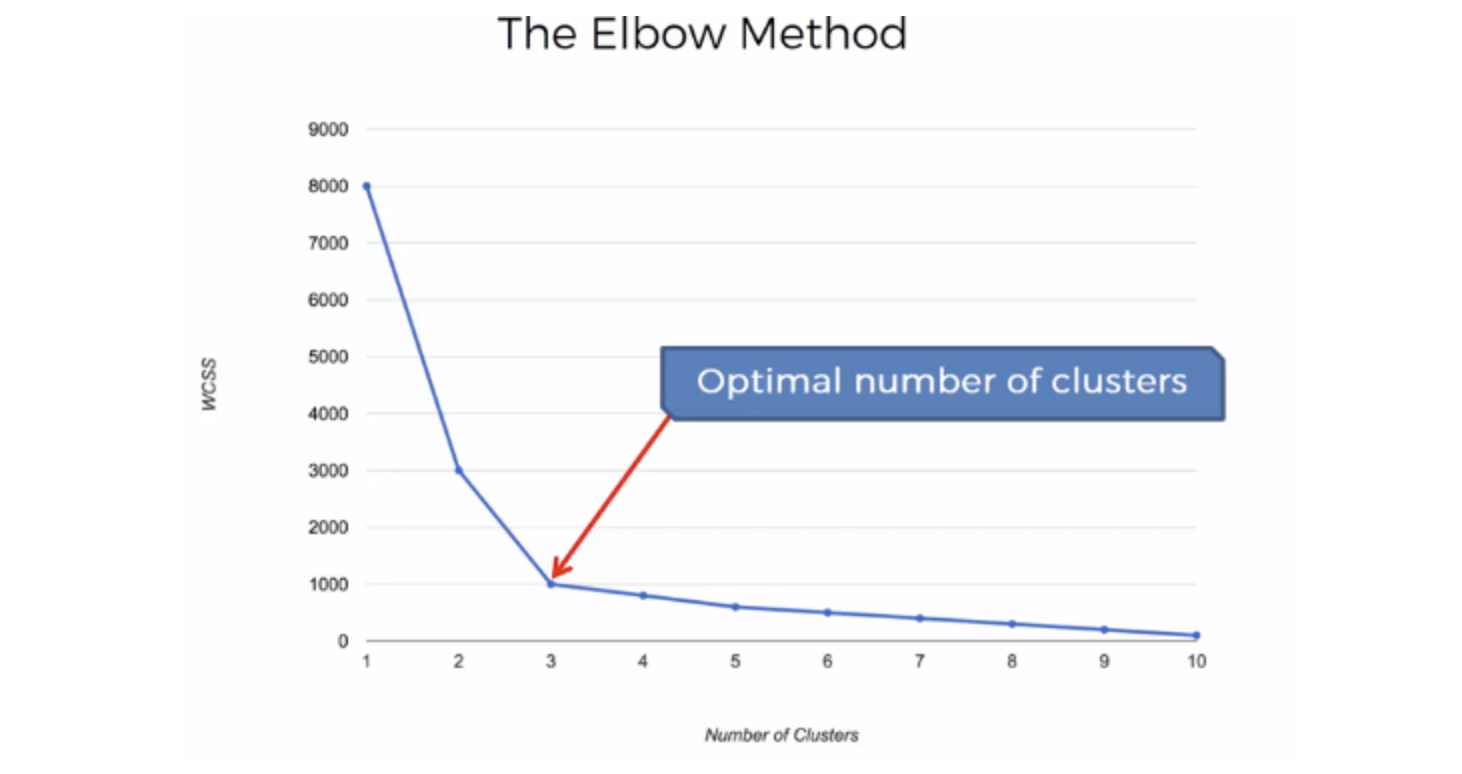

- In the depiction above we can see that after 3 there's no significant decrease in WCSS so $K=3$ is the best here. 
- It is usually a good idea to pick the number where this elbow is formed. 


### Example: Clustering customers

#### Dataset

- The dataset we are using here is the Mall Customers data.
- It’s unlabeled data that contains the details of customers in a mall:
    - Features: Gender, Age, Annual_Income (in 1000 dollars), Spending_Score

#### Goal

- Clustering the customers based on the relevant features: annual income and spending score.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#Showing samples of sliced data: annual income, and spending score
X[100:110]

array([[62, 41],
       [62, 48],
       [62, 59],
       [62, 55],
       [62, 56],
       [62, 42],
       [63, 50],
       [63, 46],
       [63, 43],
       [63, 48]], dtype=int64)

In [7]:
#Using elbow method to find a good K
wcss = []
from sklearn.cluster import KMeans
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

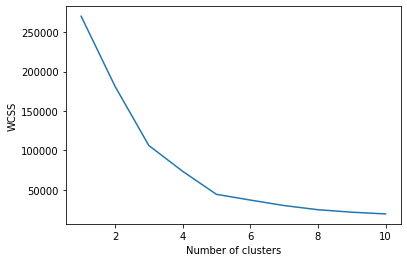

In [8]:
# K=5 seems a good point
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

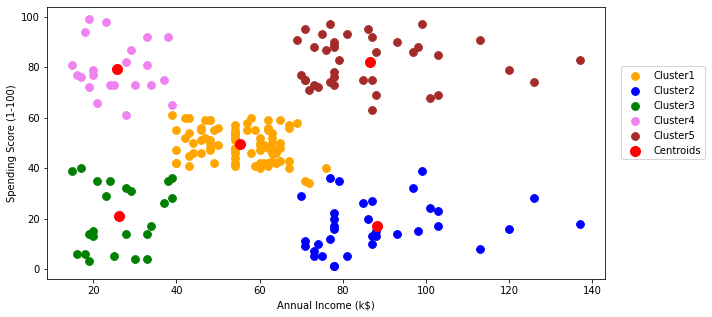

In [11]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=60, c='orange', label='Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'brown', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend(bbox_to_anchor = (1.02, 0.8))

plt.show()

In [12]:
# K=3 is also another good number for K
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

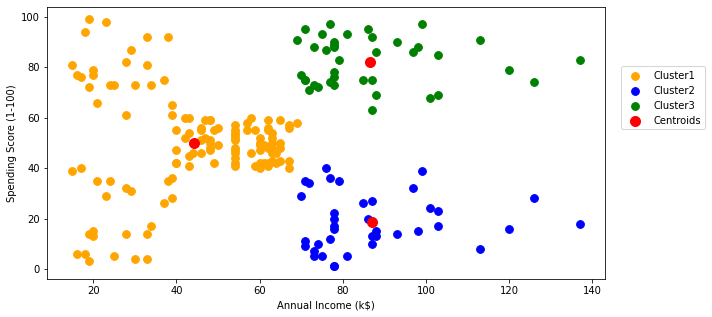

In [13]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'orange', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend(bbox_to_anchor = (1.02, 0.8))

plt.show()

### Deep Learning
- Deep learning is the name we use for creating models with stacked neural networks (i.e., networks composed of several layers).
- Each layer of the network is made of nodes.
- A node is just a place where computation happens, loosely patterned on a neuron in the human brain, which fires when it encounters sufficient stimuli.

- A node combines input from the data with a set of coefficients, or weights, that either amplify or dampen that input.
- The weights help determine the significance to inputs with regard to the task the algorithm is trying to learn.
    - For example, a classification task with minimum error.
    

<img src="dnn.png" width="120%" />

### Predicting breast cancer with a Deep Neural Network

#### Dataset
   - Name: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
   - Predicts whether the cancer is benign or malignant
   

#### Goal
- To predict patients' breast cancer type with deep learning.

**Note:** It is a supervised task with labled target (`benign` or `malignant` cancer)

#### Libraries
- We will use the `keras` library for deep learning tasks. 
- This library requires the `tensorflow` library.

With `conda`:
  - `conda install tensorflow`
  - `conda install keras`


Or, with `pip`:
  - `pip install tensorflow`
  - `pip install keras`

In [14]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Activation

from sklearn.model_selection import train_test_split

In [15]:
dataset = pd.read_csv("breast-cancer.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
#No idea why Unnamed:32 column exists. And we also don't need id column.
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# mapping function to map different string objects to integer
# we need it to map Malignant and Benign
def mapping(data, feature_column):
    featureMap = dict()
    count=0
    for feature_name in sorted(data[feature_column].unique(), reverse=True):
        featureMap[feature_name] = count
        count += 1

    data[feature_column] = data[feature_column].map(featureMap)
    return data

In [18]:
dataset = mapping(dataset, feature_column="diagnosis")

# Malignant is mapped to 0, Benign is mapped to 1
dataset["diagnosis"].sample(5)

TypeError: mapping() got an unexpected keyword argument 'feature'

In [ ]:
# divide dataset into x(input) and y(output)
X=dataset.drop(["diagnosis"],axis=1)
y=dataset["diagnosis"]

In [ ]:
# divide dataset into training set, cross validation set, and test set
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

### Layers
- We usually do not now how many layers of a neural network performs better.
- To test different, it is easier to define a function that takes number of layers.
- We will pass an array of integer to define the no. of hidden units in each layer. 
- First layer will have same no. of units as input dimension. 
- Each subsequent layer will have the units set in the array passed.

In [ ]:
# Example: arr = [30, 50, 1]; 30 input features/nodes, one hidden layer (50 nodes wide), 1 output value/nodes
def getModel(arr):
    model = Sequential()

    model.add(Dense(arr[0], input_dim=arr[0], activation='relu'))  # Input layer
    for layer in range(1, len(arr) - 1):
        model.add(Dense(arr[layer], activation='relu'))  # Hidden layer(s)
    model.add(Dense(arr[-1], activation="sigmoid"))  # Output layer

    model.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=['accuracy'])
    return model

- `model=Sequential()` will give us a model.
- `model.add()` is used to add a layer to the model.
- We will set activation function for each layer. 
- Since we need binary classification, we'll use sigmoid activation in the output layer.
- At the end we compile the model, with loss function, optimizer and the metrics we want when we will evaluate the model.

- Now we will define different models so that we can test each of them on validation set and check the accuracy.

  - Firstly, we'll use a small model which contains 3 layers with hidden units 30, 50, and 1.
  - Then we'll use a wider network which will also have 3 layers but more hidden units in the hidden layer which is 30, 100, and 1
  - Then we'll use a deeper network which will have 5 layers.

In [ ]:
firstModel=getModel([30, 50, 1])
firstModel.fit(np.array(trainX), np.array(trainY), epochs=100)

In [ ]:
scores=firstModel.evaluate(np.array(valX), np.array(valY))
print("Loss:", scores[0])
print("Accuracy:", scores[1]*100)

In [ ]:
secondModel = getModel([30, 100, 1])
secondModel.fit(np.array(trainX), np.array(trainY), epochs=100)

In [ ]:
scores = secondModel.evaluate(np.array(valX), np.array(valY))
print("Loss:", scores[0])
print("Accuracy:", scores[1]*100)

In [ ]:
thirdModel=getModel([30, 50, 70, 40, 1])
thirdModel.fit(np.array(trainX), np.array(trainY), epochs=100)

In [ ]:
scores = thirdModel.evaluate(np.array(valX), np.array(valY))
print("Loss:", scores[0])
print("Accuracy:", scores[1]*100)

In [ ]:
from sklearn.metrics import confusion_matrix
predY = thirdModel.predict(np.array(valX))
predY = np.round(predY).astype(int).reshape(1, -1)[0]

matrix = confusion_matrix(predY, valY)
tn, fn, fp, tp = confusion_matrix(predY, valY).ravel()
print(f"TN={tn}, FN={fn}, FP={fp}, TP={tp} \n")

acc = (tp + tn) / (tp + fp + tn + fn)

print("Accuracy:", acc)

In [ ]:
predY = thirdModel.predict(np.array(testX))
predY = np.round(predY).astype(int).reshape(1,-1)[0]

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(predY, testY)
tn, fn, fp, tp = confusion_matrix(predY,testY).ravel()
print(f"TN={tn}, FN={fn}, FP={fp}, TP={tp}")

In [ ]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision =", precision)
print("Recall =", recall)
print("F1 =", 2*(precision*recall)/(precision+recall))

**Question:** 
1. Build a deep neural network to predict if a persoan has diabetes or not. 
    - The "outcome" column contains either `1` for diabetes, and `0` for not.
2. Show the confusion matrix values.

In [ ]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

**Answer:**